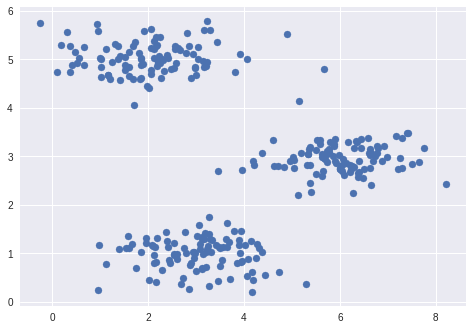

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
from sklearn.cluster import KMeans

# let's load sample 2d data to try k-means in action

mat = scipy.io.loadmat('unlabel_data.mat')
data = pd.DataFrame(mat['X'])
plt.scatter(data.loc[:,0],data.loc[:,1])

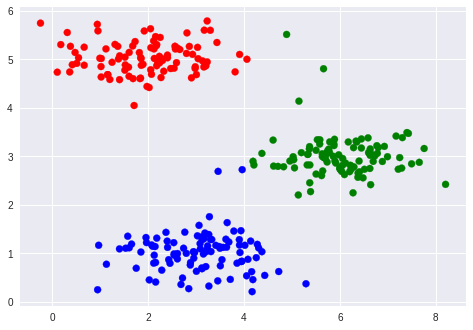

In [85]:
# K = 3 as can be seen
# let's run k-means and color clusters

kmeans = KMeans(n_clusters=3, init='random', n_init=300)
model = kmeans.fit_predict(data)
mapper = lambda x: 'r' if x==0 else 'b' if x==1 else 'g' 
colors = list(map(mapper, model))
plt.scatter(data.loc[:, 0], data.loc[:, 1], c=colors)




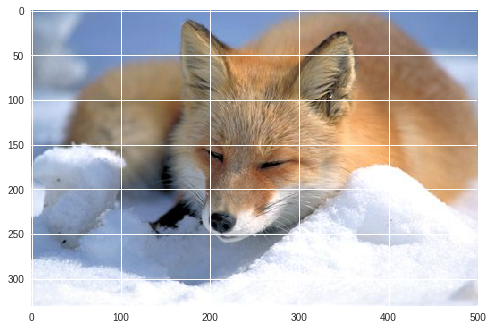

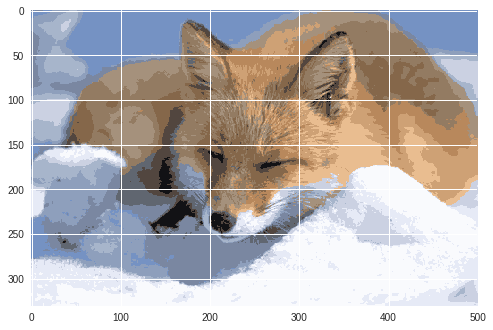

In [86]:
# let's use k-means to reduce number of colors in an image
# each pixel is a point in 3d space; we'll split them into 16 clusters
# this will get a 16-color palette best fit for given image

import imageio

pic = imageio.imread('fox.jpg')
plt.imshow(pic)
plt.show()
pic_mat =np.array(pic)
shape = pic_mat.shape
pic_ar = pic_mat.reshape((shape[0]*shape[1], 3))
kmeans = KMeans(n_clusters=16, init='random', n_init=6)
model = kmeans.fit_predict(pic_ar)
cent = kmeans.cluster_centers_ 
colors =np.array([cent[i] for i in model])
colors_round = np.round_(colors).astype(int)
compress_ar = colors_round.reshape((shape[0], shape[1], 3))
plt.imshow(compress_ar)

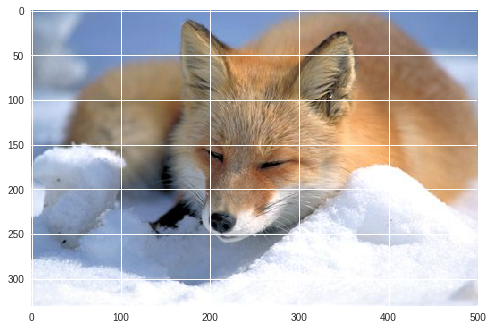

In [0]:
# 16 colors may be too rough for real-world use
# splitting into 128 clusters is much better

import imageio

pic = imageio.imread('fox.jpg')
plt.imshow(pic)
plt.show()
pic_mat =np.array(pic)
shape = pic_mat.shape
pic_ar = pic_mat.reshape((shape[0]*shape[1], 3))
kmeans = KMeans(n_clusters=128, init='random', n_init=6)
model = kmeans.fit_predict(pic_ar)
cent = kmeans.cluster_centers_ 
colors =np.array([cent[i] for i in model])
colors_round = np.round_(colors).astype(int)
compress_ar = colors_round.reshape((shape[0], shape[1], 3))
plt.imshow(compress_ar)